In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

np.set_printoptions(suppress=True)

### Hierarchical Agglomerative Clustering

We will implement (Hierarchical Agglomerative Clustering) HAC from scratch. Consider points on a 2D plane so that we can visualize them as well. 

There are three types of linkages:
1. **Single-link** - considers minimum distance between cluster and other points
2. **Complete-link** - considers maximum distance between cluster and other points
3. **Average-link** - considers average distance between cluster and other points

The algorithm will run till we end up with a single cluster encompassing all points. However, under different linkage types, we will check how intermediate clusters formed differ.

In [2]:
# number of data points
N = 6
seed = 42

In [3]:
def make_data(N, seed, plot=False):
    np.random.seed(seed)
    data = np.random.uniform(0,1,(N,2))
    if plot:
        labels = list(map(str, range(N)))
        plt.scatter(data[:, 0], data[:, 1])
        # annotate text
        for idx in range(len(data)):
            x = data[idx,0]
            y = data[idx,1]
            label = labels[idx]
            plt.annotate(label, (x,y), ha='center', fontsize=14)
        plt.show()
    return data

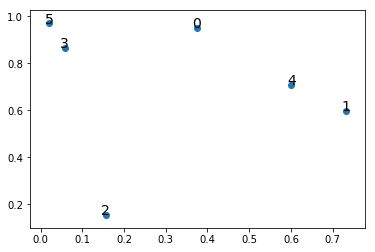

Shape of data: (6, 2)


In [4]:
data = make_data(N, seed, plot=True)
print('Shape of data:', data.shape)

In [5]:
def find_HAC(data, N, type):
    # define similarity metric
    dist = euclidean_distances(data)
    cluster_labels = [[i] for i in range(N)]

    for n_iter in range(1, N):

        # finding closest points
        idxs = np.dstack(np.unravel_index(np.argsort(dist.ravel()), dist.shape))[0]
        idx = idxs[idxs[:,0]!=idxs[:,1]][0]
        insert_cluster_idx = cluster_labels[min(idx)]
        remove_cluster_idx = cluster_labels[max(idx)]

        # linkage type - single-link/complete-link/average-link
        if type=='single-link':
            dist[min(idx), :] = np.min(dist[idx], axis=0)
            dist[:, min(idx)] = np.min(dist[idx], axis=0)
        elif type=='complete-link':
            dist[min(idx), :] = np.max(dist[idx], axis=0)
            dist[:, min(idx)] = np.max(dist[idx], axis=0)   
        else:
            dist[min(idx), :] = np.mean(np.max(dist[idx], axis=0) + np.min(dist[idx], axis=0))
            dist[:, min(idx)] = np.mean(np.max(dist[idx], axis=0) + np.min(dist[idx], axis=0))

        dist = np.delete(dist, max(idx), axis=0)
        dist = np.delete(dist, max(idx), axis=1)

        
        cluster_labels[cluster_labels.index(insert_cluster_idx)] += remove_cluster_idx
        cluster_labels.remove(remove_cluster_idx)
        print(f'Iteration {n_iter}:', cluster_labels)

In [6]:
data = make_data(N, seed, plot=False)
type = 'single-link'
find_HAC(data, N, type)

Iteration 1: [[0], [1], [2], [3, 5], [4]]
Iteration 2: [[0], [1, 4], [2], [3, 5]]
Iteration 3: [[0, 3, 5], [1, 4], [2]]
Iteration 4: [[0, 3, 5, 1, 4], [2]]
Iteration 5: [[0, 3, 5, 1, 4, 2]]


In [7]:
data = make_data(N, seed, plot=False)
type = 'complete-link'
find_HAC(data, N, type)

Iteration 1: [[0], [1], [2], [3, 5], [4]]
Iteration 2: [[0], [1, 4], [2], [3, 5]]
Iteration 3: [[0, 3, 5], [1, 4], [2]]
Iteration 4: [[0, 3, 5], [1, 4, 2]]
Iteration 5: [[0, 3, 5, 1, 4, 2]]


In [8]:
data = make_data(N, seed, plot=False)
type = 'average-link'
find_HAC(data, N, type)

Iteration 1: [[0], [1], [2], [3, 5], [4]]
Iteration 2: [[0], [1, 4], [2], [3, 5]]
Iteration 3: [[0, 2], [1, 4], [3, 5]]
Iteration 4: [[0, 2], [1, 4, 3, 5]]
Iteration 5: [[0, 2, 1, 4, 3, 5]]
